In [ ]:
!pip install --upgrade numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 86.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.


In [ ]:
!pip install mediapipe==0.10.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 13.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.16.1 requires protobuf<6.0.0dev,>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.3 which is incompatible.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 3.20.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.


In [ ]:
!pip install albumentations opencv-python tensorflow mediapipe


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 2.4 MB/s eta 0:00:00
  Using cached protobuf-3.20.3-py2.py3-none-any.whl.metadata (720 bytes)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 86.6 MB/s eta 0:00:00
Using cached protobuf-3.20.3-py2.py3-none-any.whl (162 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.16.1 requires protobuf<6.0.0dev,>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.3 which is incompatible.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 3.2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import os
import numpy as np

In [ ]:


# Define paths
base_path = "/content/drive/MyDrive/ASD"
autistic_videos = os.path.join(base_path, "autistic")
nonautistic_videos = os.path.join(base_path, "nonautistic")
output_folder = os.path.join(base_path, "frames")

os.makedirs(output_folder, exist_ok=True)

def extract_frames(video_folder, label, augment=False):
    for video_name in os.listdir(video_folder):
        video_path = os.path.join(video_folder, video_name)
        video_id = os.path.splitext(video_name)[0]
        cap = cv2.VideoCapture(video_path)

        frame_count, saved_frames = 0, 0
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            if frame_count % 10 == 0:
                frame_filename = os.path.join(output_folder, f"{video_id}_frame_{saved_frames}_{label}.jpg")
                cv2.imwrite(frame_filename, frame)

                if augment:
                    flipped_frame = cv2.flip(frame, 1)
                    flipped_filename = os.path.join(output_folder, f"{video_id}_flipped_{saved_frames}_{label}.jpg")
                    cv2.imwrite(flipped_filename, flipped_frame)

                saved_frames += 1

            frame_count += 1

        cap.release()
        print(f"Processed {video_name}, extracted {saved_frames} frames.")


extract_frames(autistic_videos, "autistic")
extract_frames(nonautistic_videos, "nonautistic", augment=True)

print(f"Frames saved in {output_folder}")


Processed vid22.mp4, extracted 51 frames.
Processed vid45.mp4, extracted 154 frames.
Processed vid27.mp4, extracted 68 frames.
Processed vid55.mp4, extracted 104 frames.
Processed vid53.mp4, extracted 31 frames.
Processed vid40.mp4, extracted 19 frames.
Processed vid25.mp4, extracted 161 frames.
Processed vid47.mp4, extracted 94 frames.
Processed vid35.mp4, extracted 127 frames.
Processed vid54.mp4, extracted 23 frames.
Processed vid48.mp4, extracted 69 frames.
Processed vid51.mp4, extracted 159 frames.
Processed vid50.mp4, extracted 110 frames.
Processed vid49.mp4, extracted 59 frames.
Processed vid28.mp4, extracted 115 frames.
Processed vid34.mp4, extracted 44 frames.
Processed vid41.mp4, extracted 286 frames.
Processed vid38.mp4, extracted 59 frames.
Processed vid20.mp4, extracted 76 frames.
Processed vid30.mp4, extracted 259 frames.
Processed vid12.mp4, extracted 173 frames.
Processed vid57.mp4, extracted 266 frames.
Processed vid15.mp4, extracted 333 frames.
Processed vid24.mp4, e

In [ ]:
import mediapipe as mp

mp_pose = mp.solutions.pose
mp_hands = mp.solutions.hands
pose = mp_pose.Pose()
hands = mp_hands.Hands()

pose_output_folder = os.path.join(base_path, "pose_frames")
os.makedirs(pose_output_folder, exist_ok=True)

for filename in sorted(os.listdir(output_folder)):
    img_path = os.path.join(output_folder, filename)
    image = cv2.imread(img_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    pose_results = pose.process(image_rgb)
    hand_results = hands.process(image_rgb)

    if pose_results.pose_landmarks:
        for landmark in pose_results.pose_landmarks.landmark:
            x, y = int(landmark.x * image.shape[1]), int(landmark.y * image.shape[0])
            cv2.circle(image, (x, y), 5, (0, 255, 0), -1)

    if hand_results.multi_hand_landmarks:
        for hand_landmarks in hand_results.multi_hand_landmarks:
            for landmark in hand_landmarks.landmark:
                x, y = int(landmark.x * image.shape[1]), int(landmark.y * image.shape[0])
                cv2.circle(image, (x, y), 5, (255, 0, 0), -1)

    output_path = os.path.join(pose_output_folder, filename)
    cv2.imwrite(output_path, image)

print(f"Pose and hand estimation applied to frames in {pose_output_folder}")


Pose and hand estimation applied to frames in /content/drive/MyDrive/ASD/pose_frames


In [ ]:
import os
import cv2
import numpy as np
from concurrent.futures import ThreadPoolExecutor

img_size = (64, 64)
sequence_length = 10
pose_output_folder = "/content/drive/MyDrive/ASD/pose_frames"
save_path = "/content/drive/MyDrive/ASD/processed_sequences.npy"
labels_path = "/content/drive/MyDrive/ASD/processed_labels.npy"

all_images = sorted(os.listdir(pose_output_folder))
if len(all_images) < sequence_length:
    raise ValueError(f"Not enough images in {pose_output_folder} to form a sequence.")

def load_image(img_path):
    """Reads and resizes an image, returns None if unreadable."""
    img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
    if img is None:
        return None
    return cv2.resize(img, img_size) / 255.0

X_train, y_train = [], []
batch_size = 500

print("Processing sequences efficiently...")

for i in range(len(all_images) - sequence_length):
    img_paths = [os.path.join(pose_output_folder, all_images[i + j]) for j in range(sequence_length)]

    with ThreadPoolExecutor(max_workers=4) as executor:
        frames = list(executor.map(load_image, img_paths))

    if any(frame is None for frame in frames):
        continue

    label = 1 if "autistic" in all_images[i].lower() else 0
    X_train.append(frames)
    y_train.append(label)

    if len(X_train) >= batch_size:
        np.save(save_path, np.array(X_train))
        np.save(labels_path, np.array(y_train))
        X_train, y_train = [],[]

if X_train:
    np.save(save_path, np.array(X_train))
    np.save(labels_path, np.array(y_train))

print(f"Processing complete! Data saved at {save_path}")


Processing sequences efficiently...
Processing complete! Data saved at /content/drive/MyDrive/ASD/processed_sequences.npy


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout

save_path = "/content/drive/MyDrive/ASD/processed_sequences.npy"
labels_path = "/content/drive/MyDrive/ASD/processed_labels.npy"

print("Loading processed data...")
X_train = np.load(save_path)
y_train = np.load(labels_path)

print(f"Data Shape: {X_train.shape}, Labels Shape: {y_train.shape}")


from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], -1)
X_val_reshaped = X_val.reshape(X_val.shape[0], X_val.shape[1], -1)

print(f"Reshaped X_train shape: {X_train_reshaped.shape}")
print(f"Reshaped X_val shape: {X_val_reshaped.shape}")

print("Building the BiLSTM model...")
model = Sequential([
    Bidirectional(LSTM(64, return_sequences=True), input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),  # Adjusted Input Shape
    Bidirectional(LSTM(32)),
    Dense(16, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.summary()

print("Training the model...")
history = model.fit(X_train_reshaped, y_train, validation_data=(X_val_reshaped, y_val), epochs=20, batch_size=32)

model_save_path = "/content/drive/MyDrive/ASD/asd_bilstm_model.h5"
model.save(model_save_path)

print(f"Model training complete! Saved at {model_save_path}")

saved_model_path = "/content/drive/MyDrive/ASD/asd_bilstm_model"
tf.saved_model.save(model, saved_model_path)

print(f"Model saved for deployment at {saved_model_path}")


Loading processed data...
Data Shape: (13, 10, 64, 64, 3), Labels Shape: (13,)
Reshaped X_train shape: (10, 10, 12288)
Reshaped X_val shape: (3, 10, 12288)
Building the BiLSTM model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_6 (Bidirectional) │ (None, 10, 128)        │     6,324,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_7 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,367,009 (24.29 MB)

 Trainable params: 6,367,009 (24.29 MB)

 Non-trainable params: 0 (0.00 B)

Training the model...
Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step - accuracy: 0.2000 - loss: 0.7446 - val_accuracy: 1.0000 - val_loss: 0.3688
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step - accuracy: 0.9000 - loss: 0.4396 - val_accuracy: 1.0000 - val_loss: 0.2327
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step - accuracy: 1.0000 - loss: 0.2716 - val_accuracy: 1.0000 - val_loss: 0.1705
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step - accuracy: 1.0000 - loss: 0.2326 - val_accuracy: 1.0000 - val_loss: 0.1245
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 1.0000 - loss: 0.1870 - val_accuracy: 1.0000 - val_loss: 0.0965
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 707ms/step - accuracy: 1.0000 - loss: 0.1787 - val_accuracy: 1.0000 - val_loss: 0.0749
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step - accuracy: 1.0000 - loss: 0.0954 - val_accuracy: 1.0000 - val_loss: 0.0583
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step - accuracy: 1.0000 - loss: 0.0916 - val_accurac

Model training complete! Saved at /content/drive/MyDrive/ASD/asd_bilstm_model.h5
Model saved for deployment at /content/drive/MyDrive/ASD/asd_bilstm_model


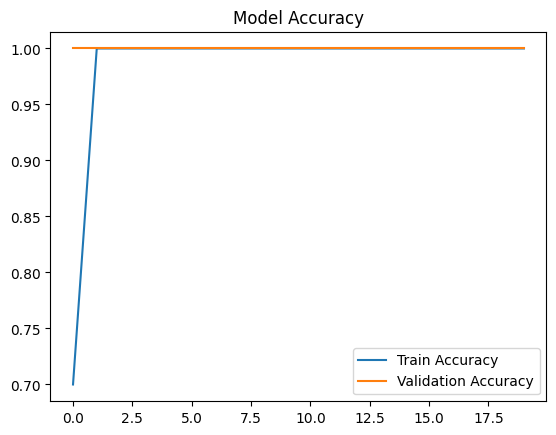

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Confusion Matrix:
 [[3]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix


plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Predictions
y_pred = (model.predict(X_val) > 0.5).astype("int32")

# Classification Report
print(classification_report(y_val, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:\n", conf_matrix)


In [ ]:
import tensorflow as tf

model_save_path = "/content/drive/MyDrive/ASD/asd_bilstm_model"
tf.saved_model.save(model, model_save_path)

print(f"Model saved for deployment at {model_save_path}")


Model saved for deployment at /content/drive/MyDrive/ASD/asd_bilstm_model


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout

model = Sequential([
    Bidirectional(LSTM(64, return_sequences=True), input_shape=(sequence_length, 12288)),
    Bidirectional(LSTM(32)),
    Dense(16, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_2 (Bidirectional) │ (None, 10, 128)        │     6,324,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,367,009 (24.29 MB)

 Trainable params: 6,367,009 (24.29 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
class_weights = {0: 10., 1: 1.}
history = model.fit(X_train_reshaped, y_train, validation_data=(X_val_reshaped, y_val), epochs=20, batch_size=32, class_weight=class_weights)



Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 1.0000 - loss: 0.0103 - val_accuracy: 1.0000 - val_loss: 0.0060
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step - accuracy: 1.0000 - loss: 0.0324 - val_accuracy: 1.0000 - val_loss: 0.0054
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 636ms/step - accuracy: 1.0000 - loss: 0.0106 - val_accuracy: 1.0000 - val_loss: 0.0048
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step - accuracy: 1.0000 - loss: 0.0166 - val_accuracy: 1.0000 - val_loss: 0.0043
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step - accuracy: 1.0000 - loss: 0.0736 - val_accuracy: 1.0000 - val_loss: 0.0039
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step - accuracy: 1.0000 - loss: 0.0062 - val_accuracy: 1.0000 - val_loss: 0.0036
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 717ms/step - accuracy: 1.0000 - loss: 0.0214 - val_accuracy: 1.0000 - val_loss: 0.0033
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step - accuracy: 1.0000 - loss: 0.0177 - val_accuracy: 1.0000 - val_loss: 0.

In [ ]:

model_save_path = "/content/drive/MyDrive/ASD/asd_bilstm_model.h5"
model.save(model_save_path)

print(f"Model training complete! Saved at {model_save_path}")


Model training complete! Saved at /content/drive/MyDrive/ASD/asd_bilstm_model.h5


In [ ]:
import tensorflow as tf

model_save_path = "/content/drive/MyDrive/ASD/asd_bilstm_model"
tf.saved_model.save(model, model_save_path)

print(f"Model saved for deployment at {model_save_path}")

Model saved for deployment at /content/drive/MyDrive/ASD/asd_bilstm_model


In [ ]:
import cv2
import numpy as np

In [ ]:


def extract_frames(video_path, img_size=(64, 64), frame_skip=5):
    """
    Extracts frames from a video at intervals and resizes them.
    - frame_skip: Extracts every `frame_skip` frame to reduce redundancy.
    """
    cap = cv2.VideoCapture(video_path)
    frames = []
    frame_count = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break


        if frame_count % frame_skip == 0:
            frame = cv2.resize(frame, img_size) / 255.0
            frames.append(frame)

        frame_count += 1

    cap.release()
    return np.array(frames)


In [ ]:
def create_video_sequences(frames, sequence_length=10):
    """
    Converts extracted frames into sequences for the model.
    """
    sequences = []
    for i in range(len(frames) - sequence_length + 1):
        sequences.append(frames[i : i + sequence_length])

    return np.array(sequences)

In [ ]:
def predict_video(video_path, model, sequence_length=10):
    frames = extract_frames(video_path)

    if len(frames) < sequence_length:
        print("Error: Video too short for prediction.")
        return

    sequences = create_video_sequences(frames)

    sequences_reshaped = sequences.reshape(sequences.shape[0], sequences.shape[1], -1)

    predictions = model.predict(sequences_reshaped)

    # Convert predictions to labels
    avg_prediction = np.mean(predictions)
    result = "Autistic" if avg_prediction >= 0.5 else "Non-Autistic"

    print(f"Prediction: {result} (Confidence: {avg_prediction:.2f})")
    return result, avg_prediction


In [ ]:
video_path = "/content/drive/MyDrive/ASD/test_video.mp4"
predict_video(video_path, model)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
Prediction: Autistic (Confidence: 1.00)


('Autistic', np.float32(0.9986423))

In [ ]:
video_path = "/content/drive/MyDrive/ASD/test_video2.mp4"
predict_video(video_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted Class: 0
Predicted Class Label: Non-Autistic


array([[1.0000000e+00, 2.6234566e-30]], dtype=float32)